# Preliminary Analysis
### Dataset: covidvaccine.csv

In [126]:
# importing libraries

import pandas as pd
import nltk
import numpy as np 
import matplotlib.pyplot as plt
import demoji

#demoji.download_codes() # run on first use of package

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.text import Text
from nltk import FreqDist

In [127]:
data = pd.read_csv("covidvaccine.csv")
data.head()


C:\Users\Jennifer Tramsu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [128]:
data.shape

(207006, 13)

In [129]:
data = data.drop(["user_created", "user_favourites", "user_name"], axis=1)
data.head()

,user_location,user_description,user_followers,user_friends,user_verified,date,text,hashtags,source,is_retweet
0,Assam,MyNewsNE a dedicated multi-lingual media house...,64.0,11.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,NaN,I will tell about all experiences of my life f...,1.0,17.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,143.0,566.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,NaN,Fresher than you.,29.0,25.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,"Adelaide, South Australia",Retired university administrator. Melburnian b...,83.0,497.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [130]:
# sort by date in ascending order

# maybe try to remove the hour --> only focus on day

data_sorted_dates = data.sort_values("date")
data_sorted_dates.head()

,user_location,user_description,user_followers,user_friends,user_verified,date,text,hashtags,source,is_retweet
4126,NaN,"‘ologist, Feminist, mother and grandmother. St...",40.0,33.0,False,01-09-2020 00:04,Don’t politicize the #CDC and the #FDA. I’m p...,"['CDC', 'FDA']",Twitter for iPhone,False
4125,NaN,"Assuming Twitter exists in the future, let thi...",2.0,166.0,False,01-09-2020 00:05,Whomever the President is needs to get the #co...,['covidvaccine'],Twitter for iPhone,False
4124,"Brisbane, Australia","Inspiring carbon neutral living, science and h...",398.0,602.0,False,01-09-2020 00:09,@GregHuntMP You forgot to mention $5 million i...,['covidvaccine'],Twitter for iPhone,False
4123,"Washington, DC",Retired White House Corr. \nEdward R. Murrow A...,13514.0,11646.0,True,01-09-2020 00:49,Is Trump pressuring #FDA for an October #Covid...,"['FDA', 'Covidvaccine']",Twitter Web App,False
4122,NaN,Wife to my man of choice. Mother of 2 awesome ...,100.0,316.0,False,01-09-2020 00:59,Here we go. #COVIDvaccine https://t.co/FZgtcJ6XDP,['COVIDvaccine'],Twitter for iPhone,False


In [131]:
# NLP on tweet content

text = data_sorted_dates["text"]
text = [str(l) for l in text]
test = ". ".join(text)

# ISSUE --> I think emojis are causing NLTK some trouble, will move on for now



In [132]:
# location --> isolate for country (assuming it is the last element)

locations = data["user_location"].dropna() # remove NaN
countries = [l for l in locations]
test = [word.split() for word in countries]
countries = pd.DataFrame(test)

countries = countries.iloc[:, 2]
countries = countries.dropna()
country = [l for l in countries]
country


['Australia',
 'Pacific',
 '20009',
 'Leeds',
 'Australia',
 'India',
 'USA',
 'NV',
 'Victoria',
 'CA',
 'Western',
 'a',
 'Monterrey,',
 'East',
 'england',
 'State',
 'India',
 'CA',
 'India',
 'India',
 'Jajpur)',
 'India',
 'Fraternity-Mumbai',
 'Kingdom',
 'Australia',
 'USA',
 'India',
 'intentional',
 'India',
 'Delhi',
 'And',
 'Calicut,',
 'And',
 'India',
 'Delhi',
 'India',
 'Kingdom',
 'India',
 'India',
 'India',
 'India',
 'And',
 'India',
 'Columbia',
 'OH',
 '🔥hell.',
 'Tahoe,',
 '78.6447°',
 'NY',
 'Kuwait',
 'India',
 'Philippines',
 '@KPFAst',
 'Moon',
 'ProcessData',
 'NY',
 'India',
 'National',
 'Hotel,',
 'bed',
 'with',
 'India',
 'Arab',
 'South',
 'India',
 'USA',
 'South',
 'Life',
 'Rocky',
 'SC',
 'TN',
 'Francisco,',
 'the',
 'SC',
 'in',
 'FL',
 'Luxembourg',
 'the',
 'Tomball,',
 'Chennai',
 'Bengal,',
 'SA',
 'Tsushima',
 'INDIA',
 'Delhi.',
 'heading',
 'Delhi',
 'Arab',
 'Málaga',
 'Canada',
 ',',
 'Council',
 'CA',
 'bathroom',
 'Council',
 'India',

In [133]:
# country frequency

# since not every actually inputs a real location --> remove stopwords

stop_words = set(stopwords.words("english"))

filtered = []

for word in country:
    if word.casefold() not in stop_words:
        filtered.append(word)

# remove punctuation >:(

punctuation = [".", ",", "(", ")", "?", "!", ":", "&"]

filtered_no_punc = []

for word in filtered:
    if word not in punctuation:
        filtered_no_punc.append(word)

filtered_no_punc


['Australia',
 'Pacific',
 '20009',
 'Leeds',
 'Australia',
 'India',
 'USA',
 'NV',
 'Victoria',
 'CA',
 'Western',
 'Monterrey,',
 'East',
 'england',
 'State',
 'India',
 'CA',
 'India',
 'India',
 'Jajpur)',
 'India',
 'Fraternity-Mumbai',
 'Kingdom',
 'Australia',
 'USA',
 'India',
 'intentional',
 'India',
 'Delhi',
 'Calicut,',
 'India',
 'Delhi',
 'India',
 'Kingdom',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Columbia',
 'OH',
 '🔥hell.',
 'Tahoe,',
 '78.6447°',
 'NY',
 'Kuwait',
 'India',
 'Philippines',
 '@KPFAst',
 'Moon',
 'ProcessData',
 'NY',
 'India',
 'National',
 'Hotel,',
 'bed',
 'India',
 'Arab',
 'South',
 'India',
 'USA',
 'South',
 'Life',
 'Rocky',
 'SC',
 'TN',
 'Francisco,',
 'SC',
 'FL',
 'Luxembourg',
 'Tomball,',
 'Chennai',
 'Bengal,',
 'SA',
 'Tsushima',
 'INDIA',
 'Delhi.',
 'heading',
 'Delhi',
 'Arab',
 'Málaga',
 'Canada',
 'Council',
 'CA',
 'bathroom',
 'Council',
 'India',
 'CO',
 'Maharashtra',
 'Australia',
 'Canyon',
 'SC',
 'bedroom',


In [134]:
# frequency dist

country = Text(filtered_no_punc)

freq_dist = FreqDist(country)

freq_dist.most_common(20)

[('CA', 3081),
 ('USA', 2753),
 ('Kingdom', 1935),
 ('India', 1788),
 ('NY', 1659),
 ('England', 1494),
 ('Canada', 1017),
 ('UK', 709),
 ('Ireland', 668),
 ('Africa', 550),
 ('City', 473),
 ('FL', 458),
 ('New', 433),
 ('South', 421),
 ('TX', 421),
 ('MO', 413),
 ('York', 392),
 ('London', 371),
 ('Delhi', 331),
 ('LA', 317)]

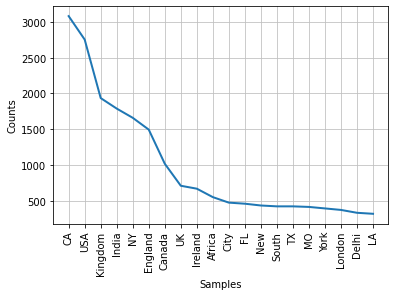

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [135]:
freq_dist.plot(20)

<p> Most tweets seem to be from Canada. However, many errors are present in how data is presented. eg. CA and Canada are not counted as one. Furthermore, location is not uniformly formatted across users. It was assumed that location was in the form (city, province/state, country).
Most notably, American states tend to abbreviated (NY, LA, FL, TX). Considering that these states appear in the most common, it is more likely that the majority of tweets originate from the US.
 </p>

In [136]:
# attempting to sort by date again

dates = data.sort_values("date").drop("source", axis=1)
text = dates["text"].dropna()
text = [l for l in text]
text = ". ".join(text)